<a href="https://colab.research.google.com/github/Drozeler/Machine-Learning/blob/main/AdvancedSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


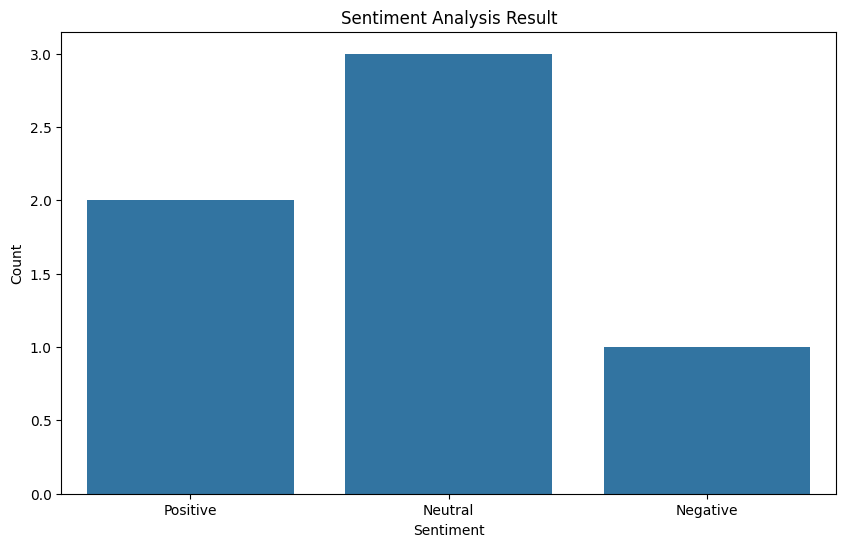

In [ ]:
# Install necessary libraries
# !pip install seaborn matplotlib nltk plotly pandas

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# List of Text
text_list = [
   "Joko Widodo: From promising democrat to Indonesia's kingmaker",
    "JokoWi Meets Former British PM Tony Blair at Presidential Palace Today",
    "Jokowi Discusses Huge Investments in AI with Microsoft CEO",
    "Indonesian President Jokowi Outlines Priorities for Economic ASEAN-Japan Partnership",
    "Human Rights Watch Says Jokowi's Term 'Ends with a Whimper",
    "Jokowi Responds to Anies Baswedan's Criticism on Democracy",
]

# Initialize the counts for each sentiment
sentiments = {'Positive' : 0, 'Neutral' : 0, 'Negative' : 0}

# Dataframe to store results
results_df = pd.DataFrame(columns=['Text', 'Sentiment', 'Score'])

# Loop through each text in the list
for text in text_list:
    # Get the sentiment score (compound)
    sentiment_score = sia.polarity_scores(text)['compound']

    # Determine the sentiment category
    if sentiment_score > 0.05:
        sentiment = 'Positive'
        sentiments['Positive'] += 1
    elif sentiment_score < -0.05:
        sentiment = 'Negative'
        sentiments['Negative'] += 1
    else:
        sentiment = 'Neutral'
        sentiments['Neutral'] += 1

    # Append the result to the dataframe
    new_row = pd.DataFrame({'Text': [text], 'Sentiment': [sentiment], 'Score': [sentiment_score]})
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the sentiment counts in a bar chart using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=list(sentiments.keys()), y=list(sentiments.values()))
plt.title('Sentiment Analysis Result')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Display individual text sentiment scores using Plotly
fig = px.bar(results_df, x='Text', y='Score', color='Sentiment', title='Sentiment Scores for Each Text',
             labels={'Score': 'Sentiment Score'}, height=400)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Display the sentiment distribution in a pie chart using Plotly
fig_pie = px.pie(values=list(sentiments.values()), names=list(sentiments.keys()), title='Sentiment Distribution')
fig_pie.show()
